1. Sandhika Surya Ardianto (5025211022)
2. Muhammad Zikri Ramadhan (5025211085)

In [41]:
import pandas as pd

In [42]:
data = pd.read_csv('spotify2019.csv')

In [43]:
data.head(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.180,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.622,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.944,0


In [44]:
print(data.isnull().sum())

artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


In [45]:
data.dropna(inplace=True)

In [46]:
duplicates = data[data.duplicated(subset=['track_id'], keep=False)]
print(f"Jumlah duplikat: {len(duplicates)}")

Jumlah duplikat: 665


In [47]:
# Drop dupliactes by 'track_id'
data = data.drop_duplicates(subset=['track_id'], keep='first')

In [48]:
# Numerical feature
data_numeric = data.select_dtypes(include=['float64', 'int64'])

In [49]:
data['tempo'] = pd.qcut(data['tempo'], q=5, labels=False) # tempo is bined into 5 bin

In [50]:
data['duration_ms'] = data['duration_ms'].apply(lambda x: x / 60000) #convert miliseconds to minutes
data.rename(columns={'duration_ms': 'duration_min'}, inplace=True)

In [51]:
import numpy as np

data['key_sin'] = np.sin(2 * np.pi * data['key']/12) # mapping key to x y coordinates in circle unit
data['key_cos'] = np.cos(2 * np.pi * data['key']/12)

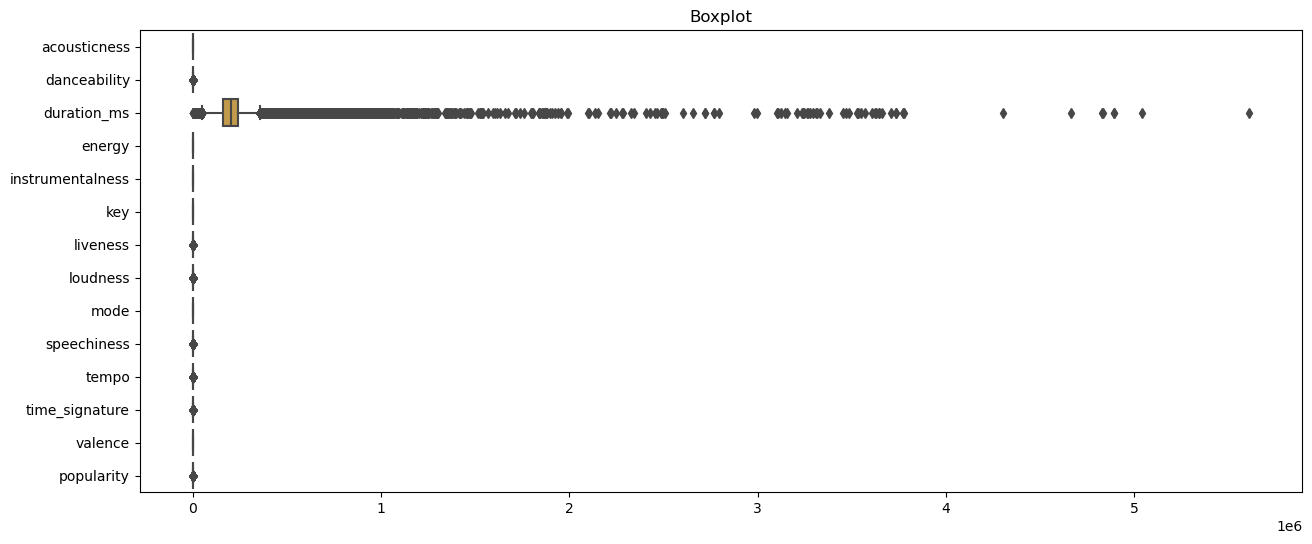

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=data_numeric, orient='h')
plt.title('Boxplot')
plt.show()

In [53]:
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True) # remove outlier based on 1.5 * IQR range
data

,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos
0,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,2.315217,0.723,0.000000,9,0.0824,-5.890,0,0.0454,2,4,0.3820,56,-1.000000,-1.836970e-16
1,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,2.089683,0.579,0.912000,5,0.0994,-12.118,0,0.0701,2,4,0.6410,0,0.500000,-8.660254e-01
2,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,2.066933,0.792,0.878000,7,0.0332,-10.277,1,0.0661,2,4,0.9280,0,-0.500000,-8.660254e-01
3,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,2.066933,0.417,0.919000,9,0.1060,-10.783,0,0.0793,2,4,0.8370,0,-1.000000,-1.836970e-16
4,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,2.212367,0.720,0.863000,4,0.0727,-8.895,0,0.1510,2,4,0.9340,0,0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81765,Echos,6Tgd0DhWYzCWrwZZB6BPNw,Revival,0.668000,0.211,4.651167,0.284,0.000111,1,0.1050,-10.317,1,0.0385,0,4,0.0638,51,0.500000,8.660254e-01
81766,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,3.175650,0.801,0.000000,11,0.0991,-5.174,1,0.0323,3,4,0.2890,57,-0.500000,8.660254e-01
81767,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,3.243050,0.249,0.000000,9,0.1030,-13.233,1,0.0437,1,4,0.3460,60,-1.000000,-1.836970e-16
81768,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,2.319850,0.532,0.000000,8,0.0997,-8.351,0,0.2060,4,4,0.5460,47,-0.866025,-5.000000e-01


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


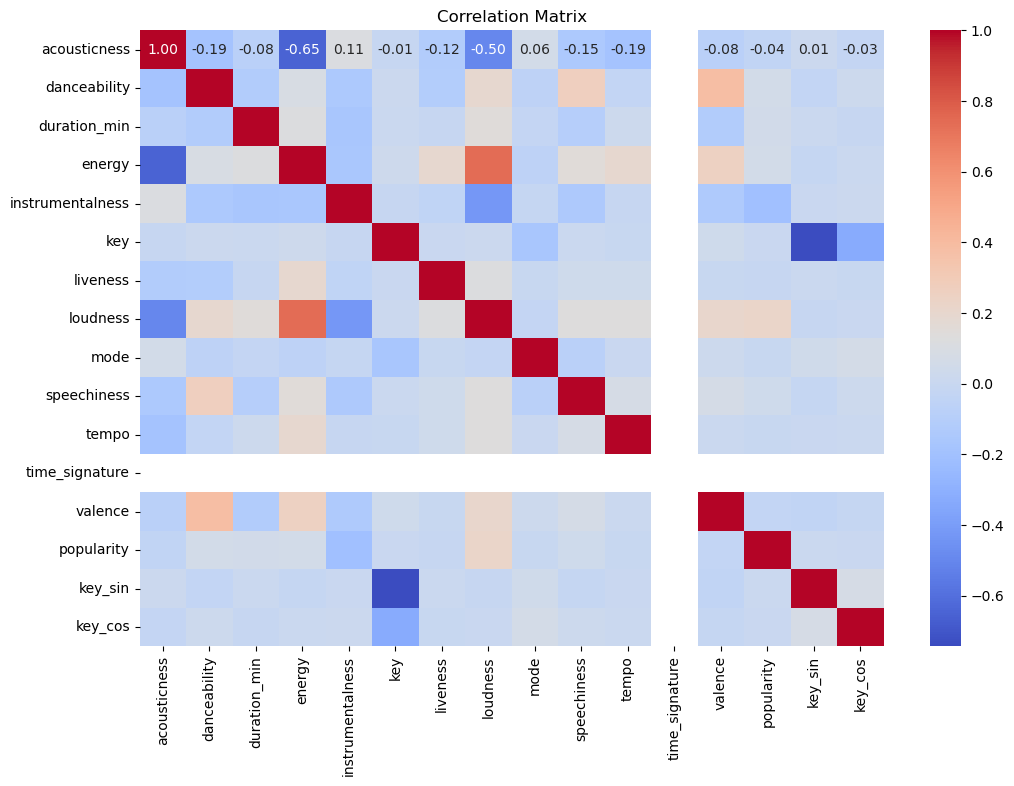

In [55]:
data_num = data.select_dtypes(include=['float64', 'int64']) # correlation between numeric features
correlation_matrix = data_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

IndexError: index 5 is out of bounds for axis 0 with size 5

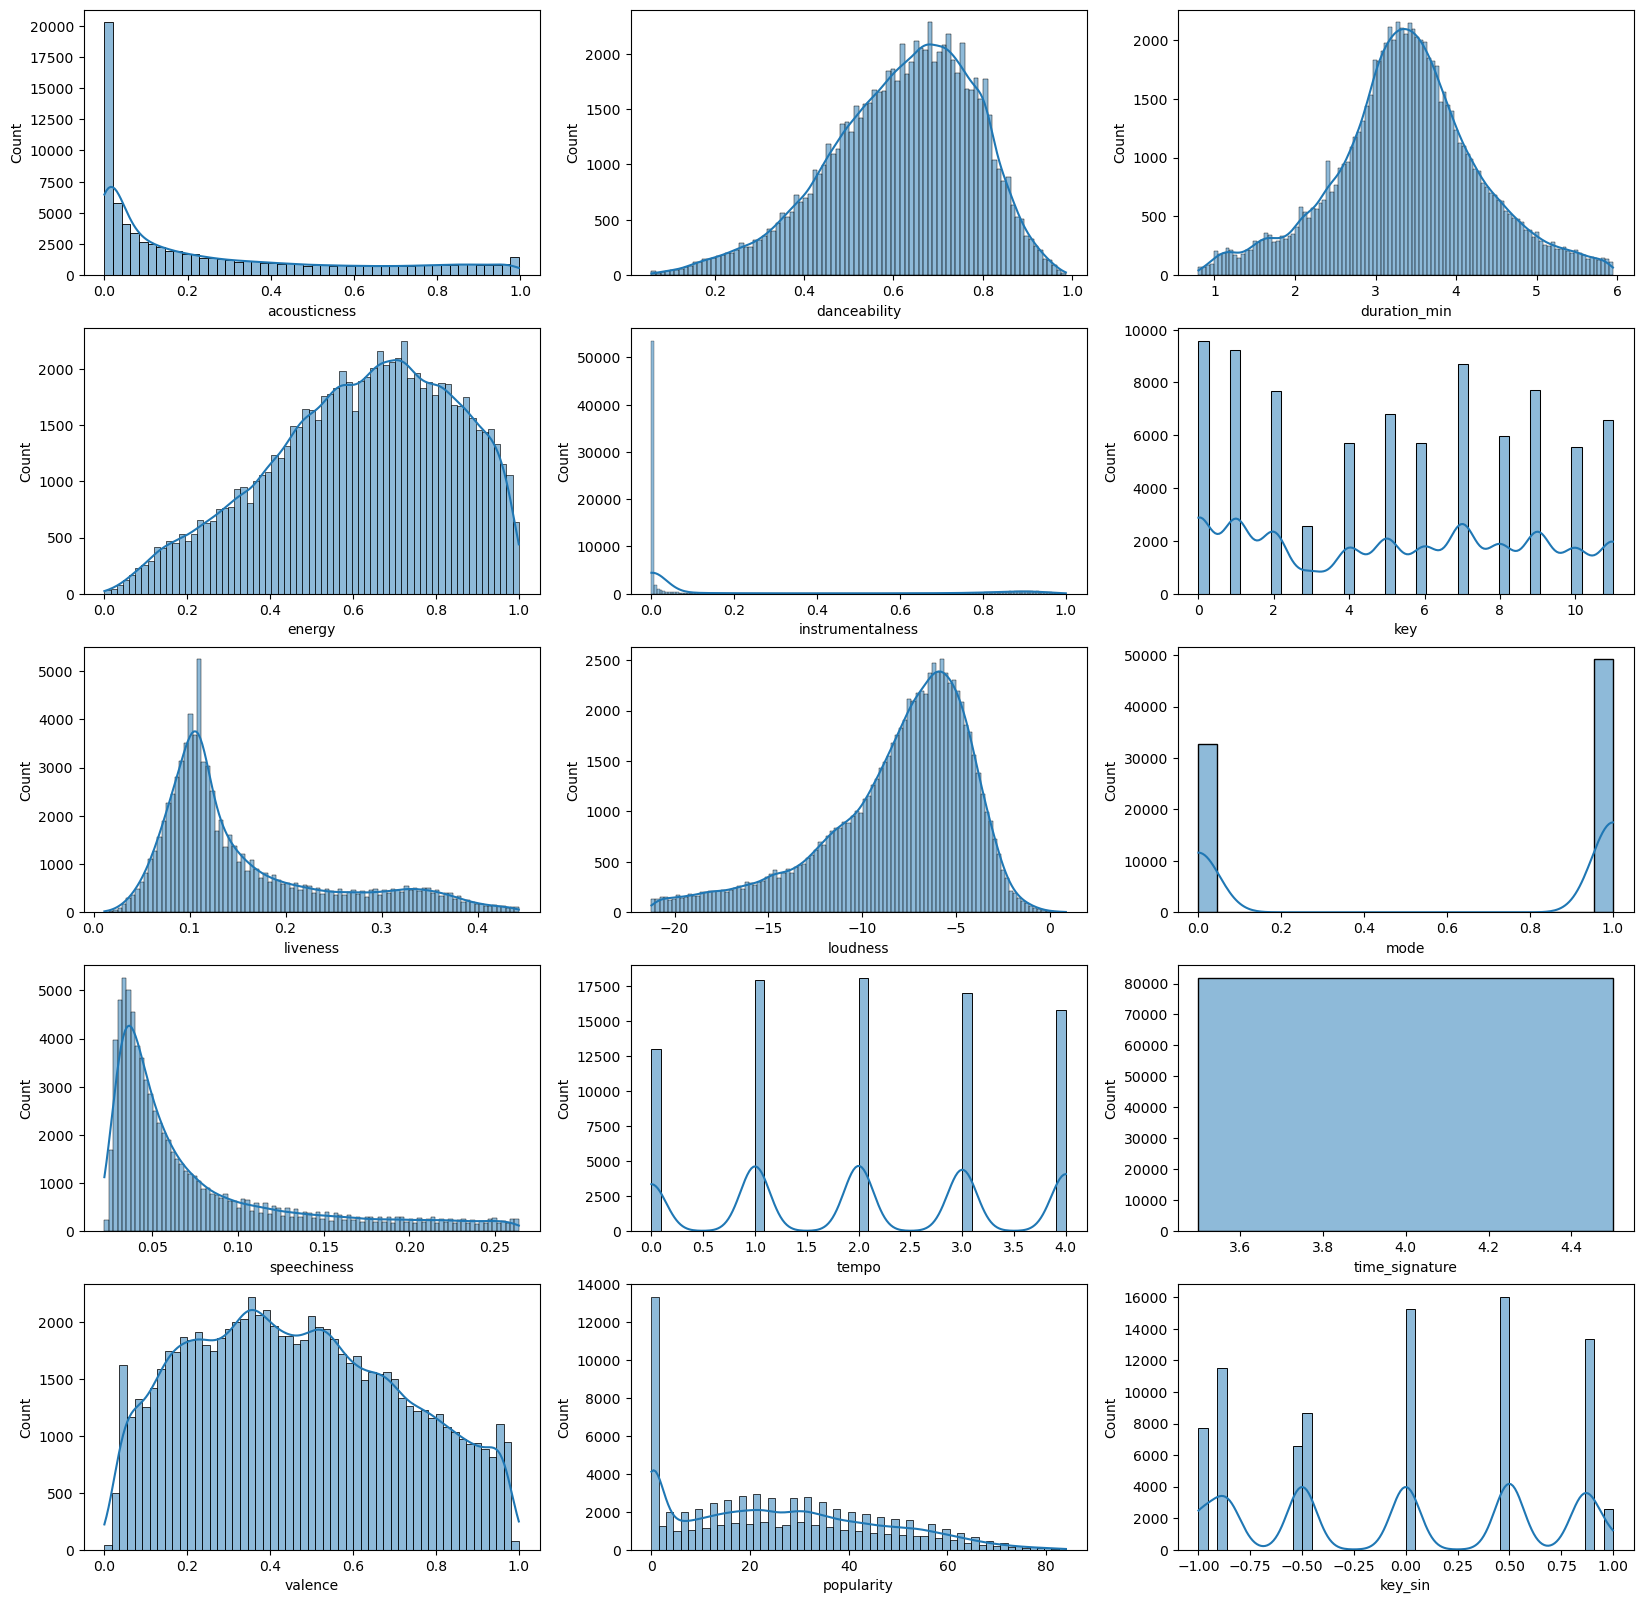

In [56]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20)) # display histogram distribution

for i, col in enumerate(data_num.columns):
  sns.histplot(data=data_num, x=col, kde=True, ax=axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler

data_numeric = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

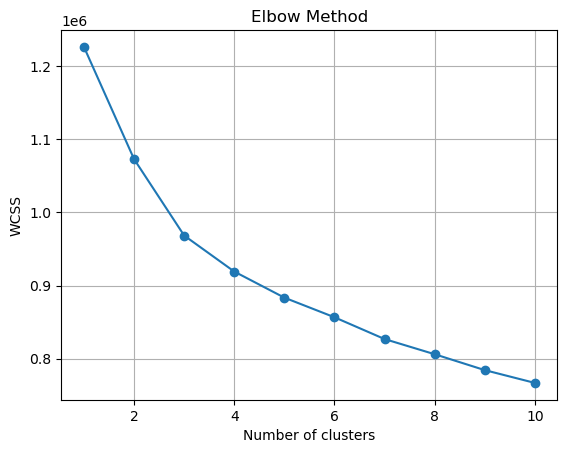

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [63]:
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
data_clustered = data.copy()
data_clustered['cluster'] = cluster_labels

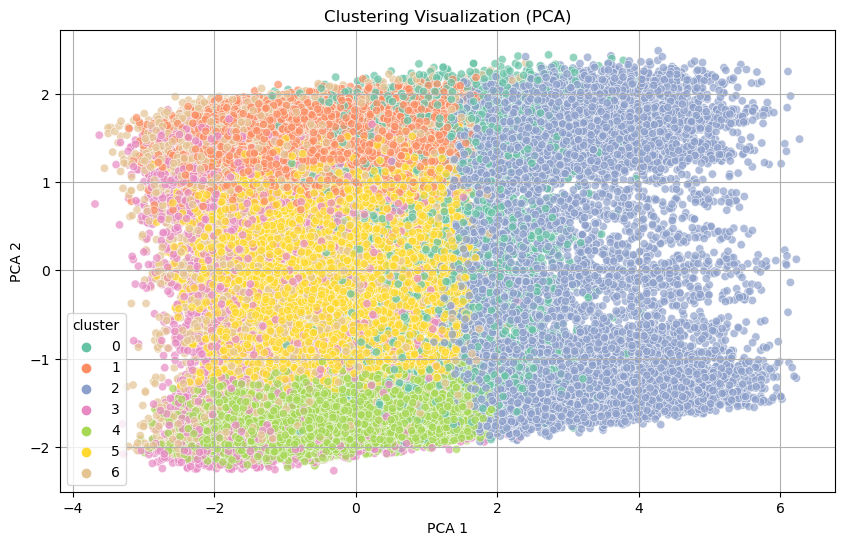

In [73]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(data_scaled)
data_clustered['PCA1'] = pca_result[:, 0]
data_clustered['PCA2'] = pca_result[:, 1]

# 5. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='Set2',
    data=data_clustered,
    legend='full',
    alpha=0.7
)
plt.title('Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

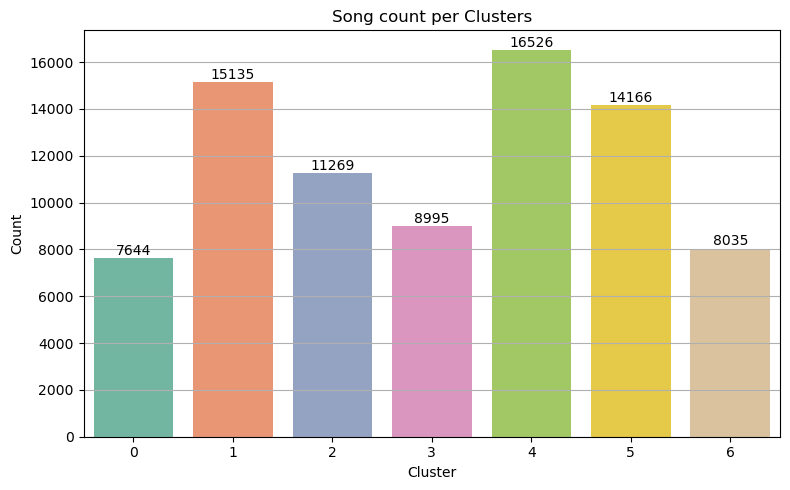

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count songs in each clusters
cluster_counts = data_clustered['cluster'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')

# Label each bar
for i, count in enumerate(cluster_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Song count per Clusters')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [75]:
import numpy as np
import pandas as pd

from sklearn.metrics import pairwise_distances_argmin_min

# Centroid of the KMeans
centroids = kmeans.cluster_centers_

# Calculate distance from the song to its centroid
distances = []
for i in range(len(data_scaled)):
    cluster_id = data_clustered.loc[i, 'cluster']
    centroid = centroids[cluster_id]
    dist = np.linalg.norm(data_scaled[i] - centroid)
    distances.append(dist)

data_clustered['distance_to_centroid'] = distances


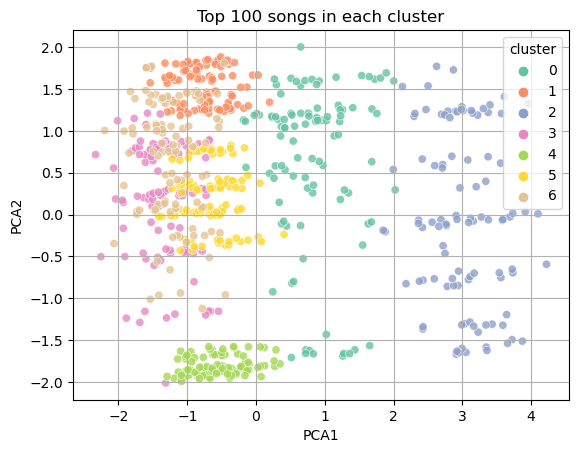

In [76]:
# Take top 100 songs only
 
top_100_nearest = (
    data_clustered
    .sort_values(['cluster', 'distance_to_centroid'])
    .groupby('cluster')
    .head(100)
    .reset_index(drop=True)
)

# Visualization
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='cluster',
    data=top_100_nearest,
    palette='Set2',
    alpha=0.8
)
plt.title("Top 100 songs in each cluster")
plt.grid(True)
plt.show()

In [77]:
for c in sorted(data_clustered['cluster'].unique()):
    print(f"\n=== Cluster {c} ===")
    display(data_clustered[data_clustered['cluster'] == c].head(10))



=== Cluster 0 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
1,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,2.089683,0.579,0.912,5,0.0994,...,2,4,0.641,0,0.500000,-8.660254e-01,0,0.834913,0.351300,2.446017
2,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,2.066933,0.792,0.878,7,0.0332,...,2,4,0.928,0,-0.500000,-8.660254e-01,0,-0.083506,1.279254,3.109505
3,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,2.066933,0.417,0.919,9,0.1060,...,2,4,0.837,0,-1.000000,-1.836970e-16,0,0.610780,2.162576,3.002212
4,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,2.212367,0.720,0.863,4,0.0727,...,2,4,0.934,0,0.866025,-5.000000e-01,0,-0.491739,-0.344745,3.511069
5,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,2.066933,0.472,0.847,8,0.0959,...,2,4,0.622,0,-0.866025,-5.000000e-01,0,0.711314,1.600955,2.372600
6,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,2.212367,0.731,0.910,11,0.0727,...,2,4,0.944,0,-0.500000,8.660254e-01,0,-0.274634,1.263043,3.317486
7,Jarka,118GQ70Sp6pMqn6w1oKuki,Strummer - Original mix,0.000784,0.787,2.066933,0.830,0.784,1,0.0373,...,2,4,0.896,0,0.500000,8.660254e-01,0,-0.362531,-1.542474,3.682303
8,Big Koola,6S7cr72a7a8RVAXzDCRj6m,Big Racks - Original mix,0.000106,0.777,2.133600,0.865,0.812,7,0.0791,...,2,4,0.695,0,-0.500000,-8.660254e-01,0,-0.078456,1.233961,2.820657
9,Scatox,7h2qWpMJzIVtiP30E8VDW4,Rulet - Original mix,0.000223,0.796,2.212367,0.698,0.919,10,0.0727,...,2,4,0.964,0,-0.866025,5.000000e-01,0,-0.355390,1.947054,3.333575
10,Jupitar,3KVQFxJ5CWOcbxdpPYdi4o,Head - Original mix,0.000037,0.815,2.246150,0.709,0.938,1,0.0892,...,2,4,0.489,0,0.500000,8.660254e-01,0,0.599801,-1.610128,2.567254



=== Cluster 1 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
0,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,2.315217,0.723,0.000000,9,0.0824,...,2,4,0.3820,56,-1.000000,-1.836970e-16,1,-1.029434,1.724298,2.507844
42,Snow Patrol,0aYzQjr1hq0qJwp45diy5M,Heal Me,0.122000,0.552,4.019333,0.789,0.000005,9,0.0874,...,1,4,0.3490,53,-1.000000,-1.836970e-16,1,-0.850080,1.306647,2.346541
47,Lake Street Dive,5eyPkSDWFQNnnkZhFfE6Yo,Good Kisser - Recorded at Spotify Studios NYC,0.167000,0.570,4.093267,0.556,0.000000,10,0.0868,...,4,4,0.6910,38,-0.866025,5.000000e-01,1,-0.697376,1.269298,2.313375
48,Dominion,2YWgPHZSzjfkh2dPsEuaTm,Balenciaga,0.039300,0.751,3.716667,0.512,0.000033,11,0.2670,...,4,4,0.3350,2,-0.500000,8.660254e-01,1,-0.837081,1.269418,3.153494
57,ARTY,7915iolh0QvdpvSIiAj3h4,Rain (ASOT 874),0.000128,0.368,3.376167,0.644,0.065400,10,0.1950,...,3,4,0.0694,19,-0.866025,5.000000e-01,1,0.454006,1.147130,3.169406
78,Xavier Wulf,2a4EjsC0cpRXPQ9moclzbi,Check It Out (Remix) [feat. Skepta],0.315000,0.842,2.025917,0.653,0.000000,9,0.1040,...,4,4,0.8440,42,-1.000000,-1.836970e-16,1,-1.348408,1.939141,3.442183
84,Rakeem Miles,2cbPnoLB6GglJnNhYWiz0j,Hardway,0.023600,0.944,3.054550,0.752,0.001260,11,0.1150,...,1,4,0.2950,28,-0.500000,8.660254e-01,1,-1.199583,0.996663,2.786111
88,Alexander Gold,6619EaPz9Kyp57avUUgfpK,Troubled,0.729000,0.459,3.373433,0.501,0.000000,10,0.1590,...,0,4,0.4100,0,-0.866025,5.000000e-01,1,1.201576,1.405153,3.324167
99,Hosannas,6njLwZapKia8OaFhftXZY3,Hands,0.558000,0.616,4.699300,0.419,0.000348,9,0.0636,...,3,4,0.3280,19,-1.000000,-1.836970e-16,1,0.896219,1.867162,2.822047
106,Ethan Payton,6JMPvJ6M6oHctDsIdGEcq5,On The Move,0.504000,0.841,3.460867,0.402,0.000003,9,0.0984,...,2,4,0.5420,26,-1.000000,-1.836970e-16,1,0.660088,1.663278,2.534062



=== Cluster 2 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
39,Burbank,7AgDITo8BVDoh2bXj2psYA,Waiting for U,0.832,0.6990,2.800000,0.309,0.171000,4,0.1160,...,0,4,0.4220,31,0.866025,-5.000000e-01,2,1.935326,-0.681115,3.347182
40,Betty Who,0Hd2n9oE0n4szD6mzrvcV4,Friend Like Me,0.925,0.6110,3.624433,0.238,0.000004,11,0.1230,...,2,4,0.2480,44,-0.500000,8.660254e-01,2,2.342897,1.158344,3.032922
51,Sleeping At Last,0aNAiwG9kCxFKCJVbo6B1J,"July 27, 2018: Total Lunar Eclipse",0.927,0.3360,1.709500,0.294,0.968000,8,0.0965,...,3,4,0.1560,37,-0.866025,-5.000000e-01,2,4.120287,1.629647,3.599234
87,Curtis Walsh,0C5jmw61aKNP6ngy0FXm56,Full Recovery,0.786,0.5240,2.935583,0.307,0.000000,9,0.1110,...,4,4,0.4080,54,-1.000000,-1.836970e-16,2,1.418652,1.523834,3.597156
90,deadmau5,6vx0xD9tCnPhbOdC1s0cHM,imaginary friends - ov,0.572,0.0971,1.718750,0.178,0.934000,7,0.0824,...,4,4,0.0458,40,-0.500000,-8.660254e-01,2,4.251196,1.140779,4.531017
115,Wet,5cDI5fy6WTipWVNoVXWVmb,Out of Tune,0.690,0.4130,3.698883,0.272,0.000007,0,0.1800,...,2,4,0.1190,44,0.000000,1.000000e+00,2,2.248219,-1.596999,2.987682
116,Mayday Parade,5vzoiQE2cXQalI7FzI8Qyf,Always Leaving,0.764,0.5910,3.690233,0.321,0.003610,2,0.1040,...,1,4,0.5670,43,0.866025,5.000000e-01,2,2.071943,-1.594053,2.807015
132,John Coltrane,7aGpjo6SB59tpTiMlD1uvL,Untitled Original 11383 - Take 1,0.706,0.4290,5.686883,0.368,0.000002,8,0.2940,...,2,4,0.5960,47,-0.866025,-5.000000e-01,2,1.496653,1.405757,4.240259
224,Johann Sebastian Bach,3no75FW83pP3d0I1sXrukX,"Keyboard Concerto in A Major, BWV 1055 (Arr. D...",0.945,0.5390,4.433333,0.362,0.724000,9,0.2690,...,1,4,0.5870,8,-1.000000,-1.836970e-16,2,2.798447,1.745444,3.396262
226,Johann Sebastian Bach,3Txci3oTHdo7fRBT1qEfSu,"Keyboard Concerto in A Major, BWV 1055 (Arr. D...",0.926,0.3970,4.483333,0.341,0.869000,9,0.3240,...,1,4,0.5560,4,-1.000000,-1.836970e-16,2,3.159972,1.719546,3.852575



=== Cluster 3 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
50,Loote,6bVIL7Jn0hHto1WftJ2VxU,Longer Than I Thought,0.092200,0.750,3.597783,0.715,0.000009,9,0.395,...,2,4,0.3330,4,-1.000000e+00,-1.836970e-16,3,-1.337105,1.339964,2.790003
52,Beatsole,3Rx1zM3nDFQzAOYg9Hd0D4,Shanti (ASOT 874),0.000215,0.435,4.618300,0.796,0.887000,2,0.407,...,3,4,0.1060,31,8.660254e-01,5.000000e-01,3,0.509724,-2.004509,4.090772
53,Ferry Corsten,6F5J2WFkygpTK89V7ovVB1,I Love You (ASOT 874),0.000036,0.489,2.870733,0.932,0.125000,2,0.294,...,3,4,0.6200,23,8.660254e-01,5.000000e-01,3,-0.777093,-1.918166,2.765624
63,Hamzeh,5BCnkUBpOza5RMvAc7hhhW,Frostbite (ASOT 874),0.007760,0.433,2.934500,0.787,0.883000,8,0.390,...,3,4,0.2140,14,-8.660254e-01,-5.000000e-01,3,0.563888,1.264044,3.705948
64,MaRLo,6d4kE5Kz6ZD4XNrItzdG2m,Haunted (ASOT 874) - Avao Remix,0.000977,0.499,4.059000,0.722,0.515000,7,0.331,...,3,4,0.0844,17,-5.000000e-01,-8.660254e-01,3,0.360696,0.843978,3.084556
65,Monada,6m7oudpYFspprKzxVAEr6q,Sunbeam (ASOT 874),0.000017,0.365,2.646333,0.881,0.966000,4,0.428,...,3,4,0.1200,13,8.660254e-01,-5.000000e-01,3,0.682285,-0.763577,4.330548
66,Armin van Buuren,6YAL6PEqjMuZQ7KTLD8W4q,We Control The Sunlight (ASOT 874) - Dan Stone...,0.000013,0.418,3.924167,0.860,0.465000,6,0.224,...,3,4,0.2060,16,1.224647e-16,-1.000000e+00,3,-0.014508,0.635333,3.161631
67,Armin van Buuren,4XG9o1DYkfDf4q5olv04ca,Missing (ASOT 874) - Jorn van Deynhoven Remix,0.000019,0.456,3.200000,0.948,0.457000,7,0.288,...,3,4,0.0810,16,-5.000000e-01,-8.660254e-01,3,-0.171130,0.834576,3.106308
68,MaRLo,7EzEEmLfztTRDMLqSDE5Dk,Always Be Around (ASOT 874) - Pinkque Remix,0.000209,0.392,3.419333,0.816,0.371000,4,0.327,...,3,4,0.0373,15,8.660254e-01,-5.000000e-01,3,0.263529,-0.822447,3.261834
69,Cosmic Gate,2FAWvFvbnIQewuisjPhcmh,Exploration Of Space (ASOT 874),0.007040,0.425,0.981833,0.922,0.010900,7,0.331,...,3,4,0.6950,12,-5.000000e-01,-8.660254e-01,3,-0.831049,0.949295,3.779745



=== Cluster 4 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
45,Tabi Bonney,4NoBWcboBPNVI9Lf7e3ihA,Faded,0.004320,0.858,3.622850,0.698,0.377000,0,0.180,...,2,4,0.734,15,0.000000,1.000000,4,-1.103542,-1.505901,2.946874
46,Trevor Hall,5iz6oTqd2Xu0FLdTwom6mK,Free,0.774000,0.523,4.304250,0.615,0.000020,0,0.365,...,1,4,0.637,42,0.000000,1.000000,4,0.472270,-1.615895,3.717136
58,ARTY,1F71wFfIO5MMcD5YRIgAi8,Sunrise (ASOT 874),0.001850,0.274,3.196333,0.404,0.003190,0,0.232,...,3,4,0.220,19,0.000000,1.000000,4,1.172244,-1.711867,3.521503
71,Above & Beyond,4QtksZ3EZhNpiBlNAj3WU6,My Own Hymn (ASOT 874) - ALPHA 9 Remix,0.000643,0.296,4.350983,0.580,0.000176,0,0.262,...,3,4,0.156,14,0.000000,1.000000,4,0.634234,-1.793305,3.558359
75,Armin van Buuren,3VpWFnitRRiO8keadeQyEi,Shivers (ASOT 874) - ALPHA 9 Remix,0.000121,0.440,5.373333,0.789,0.235000,1,0.242,...,3,4,0.192,14,0.500000,0.866025,4,0.031009,-2.023935,3.400236
81,Jvnior,0wHTdKho5nt3akZbp06Sxb,Need You,0.166000,0.748,2.438467,0.637,0.003600,2,0.321,...,1,4,0.671,37,0.866025,0.500000,4,-0.718544,-1.785446,2.900909
96,Chaos Chaos,35hWFT2iRk3hUYUnYRY9YL,Kanye's Bday Song,0.041000,0.829,2.133333,0.727,0.000042,1,0.121,...,2,4,0.895,39,0.500000,0.866025,4,-1.225337,-1.692564,2.977029
97,Alex Da Kid,1Fj145pL4KfM2dyqabvkvl,"Go 2.0 (feat. Jorja Smith, H.E.R. and Rapsody)",0.023700,0.586,3.452883,0.569,0.000000,1,0.179,...,3,4,0.650,48,0.500000,0.866025,4,-0.947301,-1.544082,2.276893
98,Kygo,0zhBS3T33cnJUwfoOEmlCL,Kids in Love (feat. The Night Game) - The Him ...,0.104000,0.532,3.265333,0.723,0.000009,0,0.114,...,2,4,0.181,48,0.000000,1.000000,4,-0.546488,-1.795830,2.102674
100,Chris Lane,5IuclbcdIMGedvvvhWgdYh,Number One,0.417000,0.589,3.706450,0.745,0.000000,0,0.195,...,3,4,0.484,1,0.000000,1.000000,4,-0.506676,-1.696527,2.322365



=== Cluster 5 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
36,Mr Little Jeans,3Z78Hd9B1OndIo7XJajwYR,Forgetter,0.125000,0.821,4.235367,0.512,0.007030,5,0.0879,...,3,4,0.5430,28,5.000000e-01,-0.866025,5,-0.683461,0.073984,2.097393
37,Orjan Nilsen,16UKw34UY9w40Vc7TOkPpA,Nothing Here But Love,0.044800,0.574,3.157783,0.881,0.000000,5,0.0756,...,2,4,0.5510,29,5.000000e-01,-0.866025,5,-2.108197,-0.060288,2.876131
41,Your Smith,5Y7DSov75Ic5viePFoD0WX,The Spot,0.061700,0.935,2.856383,0.756,0.000008,4,0.1200,...,2,4,0.9610,48,8.660254e-01,-0.500000,5,-1.753309,-0.904501,3.342078
54,Audien,6cVeUZciqheFBEaJ4haQdJ,Higher (ASOT 874),0.000426,0.441,2.531667,0.472,0.001900,6,0.1150,...,3,4,0.0655,20,1.224647e-16,-1.000000,5,1.044297,0.731891,3.367363
55,Elevven,74pdubLPY21sp8poN4Jxoi,Heartbeat Tonight (ASOT 874) [Progressive Pick],0.000090,0.483,3.959267,0.743,0.002080,6,0.1100,...,3,4,0.1020,18,1.224647e-16,-1.000000,5,-0.202184,0.636197,2.796189
76,ALPHA 9,0DL6M2BeSEKJjrLEj54LvG,Sleepwalker (ASOT 874),0.000043,0.210,3.151667,0.506,0.038000,4,0.2070,...,2,4,0.1340,13,8.660254e-01,-0.500000,5,1.113801,-0.733222,3.957466
79,Spirit Animal,3feiDuC0ErNBTyFt61mDpJ,YEAH!,0.000254,0.523,3.272383,0.665,0.011000,4,0.1100,...,4,4,0.3860,17,8.660254e-01,-0.500000,5,-0.692742,-1.131398,2.512500
83,Jon Z,4e2cAiSYtXiDzomtvBS4CT,The timeless one,0.044100,0.412,3.079167,0.618,0.294000,6,0.1910,...,4,4,0.1390,19,1.224647e-16,-1.000000,5,0.206260,0.227090,3.100124
85,Mantraa,4dVWz5zq7XXigjOfrAfI19,Movin On,0.001620,0.779,3.000000,0.859,0.015200,5,0.2250,...,2,4,0.5590,20,5.000000e-01,-0.866025,5,-1.825635,-0.400373,2.370217
92,Nathan Fouts,2HnwAMmCf1bn0DEZZq1Zsp,Educated,0.247000,0.466,4.533333,0.513,0.000000,4,0.0934,...,1,4,0.2350,0,8.660254e-01,-0.500000,5,0.967602,-0.961832,3.219065



=== Cluster 6 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
43,Money Man,7d2RGG3rRRex2lG8LlEHYo,Bday Cake,0.00593,0.867,1.817600,0.517,0.000000,2,0.1310,...,3,4,0.179,15,0.866025,5.000000e-01,6,-0.369466,-1.706878,3.417046
44,Demun Jones,0RS401jpQlguNb7ozzpri3,Sound on the Water,0.15700,0.686,3.500083,0.873,0.000003,9,0.1500,...,0,4,0.386,40,-1.000000,-1.836970e-16,6,-1.886540,1.402208,3.054839
49,Lecrae,1FYd1szE0RHXOAM00V4MEx,Coming In Hot,0.02710,0.890,3.336133,0.454,0.000004,8,0.1570,...,3,4,0.425,70,-0.866025,-5.000000e-01,6,-1.453426,1.369451,3.388630
59,Armin van Buuren,7frbTr9qYVdeXjUUC6HwOj,"A State Of Trance (ASOT 874) - Coming Up, Pt. 3",0.15100,0.538,0.818667,0.858,0.000000,8,0.1440,...,3,4,0.703,14,-0.866025,-5.000000e-01,6,-0.708040,1.467160,3.966541
61,Xavier Wulf,753SBYPEiJG9wTkXBSgMce,Wake Walker,0.16900,0.832,2.222483,0.457,0.000029,1,0.1330,...,3,4,0.227,39,0.500000,8.660254e-01,6,0.092547,-1.743481,3.143204
95,Marvelus Fame,1D0WEXnRvglieRauHKrypU,Camara Lenta,0.67900,0.718,3.430367,0.695,0.000003,5,0.0902,...,3,4,0.467,47,0.500000,-8.660254e-01,6,-0.698911,-0.279961,2.734797
101,Rico Nasty,4rNcajJ4guG6OnbMp7TkgK,In The Air (feat. BlocBoy JB),0.20700,0.844,2.973417,0.931,0.000000,11,0.1190,...,3,4,0.849,46,-0.500000,8.660254e-01,6,-3.305966,1.315038,3.561799
128,Beau Young Prince,1BeLO7QAJG0dC1TKva3x93,Kill Moe,0.17200,0.866,2.723117,0.576,0.000002,5,0.1300,...,4,4,0.713,43,0.500000,-8.660254e-01,6,-1.271102,-0.219080,2.733356
133,Mura Kami,6F4pkNcQDdo9Q76nJh8pHA,Swaying Leaves,0.79400,0.901,2.182433,0.228,0.882000,7,0.1320,...,0,4,0.828,28,-0.500000,-8.660254e-01,6,2.171378,1.985465,5.430078
135,Young Troubel,0O8RQg8tHSxahLdW3Hjry5,Patience,0.33900,0.598,3.738983,0.880,0.000000,9,0.1210,...,4,4,0.759,0,-1.000000,-1.836970e-16,6,-2.086373,1.784218,3.438702


In [78]:
# Clusters Summary

cluster_summary = data_clustered.groupby('cluster')[data_num.columns].mean().round(2)
display(cluster_summary)

,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos
cluster,,,,,,,,,,,,,,,,
0,0.19,0.66,2.58,0.59,0.84,5.31,0.14,-11.03,0.58,0.06,2.20,4.0,0.50,11.74,-0.06,0.06
1,0.21,0.65,3.57,0.67,0.07,9.54,0.13,-6.78,0.52,0.06,2.09,4.0,0.50,28.50,-0.81,0.23
2,0.80,0.47,3.26,0.27,0.37,4.98,0.14,-14.11,0.68,0.05,1.47,4.0,0.30,22.78,0.03,0.01
3,0.10,0.55,3.52,0.80,0.14,5.49,0.34,-5.90,0.58,0.08,2.45,4.0,0.46,25.84,-0.02,-0.10
4,0.20,0.64,3.56,0.67,0.07,1.01,0.13,-6.78,0.75,0.06,2.10,4.0,0.48,28.64,0.44,0.77
5,0.21,0.64,3.61,0.67,0.05,5.56,0.12,-6.74,0.52,0.06,2.04,4.0,0.50,29.18,0.18,-0.80
6,0.21,0.73,3.19,0.65,0.03,5.38,0.15,-7.25,0.51,0.21,2.21,4.0,0.51,27.49,-0.05,0.03


In [85]:
# Top 100 By Popularity in Each Clusters

top_100_popular_each_cluster = (
    data_clustered
    .sort_values(['cluster', 'popularity'], ascending=[True, False])
    .groupby('cluster')
    .head(100)
    .reset_index(drop=True)
)

for c in sorted(top_100_popular_each_cluster['cluster'].unique()):
    print(f"\n=== Cluster {c} ===")
    display(
        top_100_popular_each_cluster[top_100_popular_each_cluster['cluster'] == c].head(10)
    )


=== Cluster 0 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
0,Yüzyüzeyken Konuşuruz,11PO9iu6PtpgL1JK4QNUEJ,Dinle Beni Bi',0.5620,0.557,2.415117,0.683,0.897,9,0.1070,...,1,4,0.543,68,-1.000000e+00,-1.836970e-16,0,0.945977,1.959746,3.968991
1,SwuM,1C4bLgUJIKJroNvSU0hz1R,The Dream,0.7550,0.637,2.635550,0.571,0.862,11,0.1040,...,4,4,0.286,67,-5.000000e-01,8.660254e-01,0,1.158223,1.487924,4.781495
2,Sarcastic Sounds,5utrtANUaATItHm4Twgp6Z,It's OK to Cry,0.3710,0.772,1.700933,0.502,0.922,10,0.0917,...,4,4,0.145,67,-8.660254e-01,5.000000e-01,0,1.505865,1.792550,4.399497
3,Fujitsu,5rBQIzDduJsmDbZ97gqWEW,sand castles,0.5760,0.784,2.461533,0.312,0.851,4,0.1280,...,3,4,0.630,67,8.660254e-01,-5.000000e-01,0,2.026882,-0.326658,4.126427
4,Toonorth,5TuhMyeZ7bBd3A0PzKNW4D,Silience,0.0295,0.635,3.282050,0.252,0.779,6,0.1190,...,0,4,0.667,66,1.224647e-16,-1.000000e+00,0,1.207946,0.604215,4.072948
5,Leavv,42GhletESlrhyhtFkjkf6Q,Voyage,0.1020,0.743,2.321250,0.204,0.900,5,0.1120,...,4,4,0.435,66,5.000000e-01,-8.660254e-01,0,1.211691,0.215406,4.090988
6,Tesk,2B2DoTt6xuP1NrR7pKZBR8,Hideout,0.0273,0.595,2.190717,0.224,0.837,9,0.0844,...,4,4,0.439,66,-1.000000e+00,-1.836970e-16,0,0.966467,1.891004,4.236098
7,Beowülf,0sMImBteCIVUKNhcyx3Cyx,Today Is a Gift,0.5570,0.763,2.579600,0.314,0.873,5,0.1140,...,3,4,0.509,66,5.000000e-01,-8.660254e-01,0,2.249895,0.008540,4.130777
8,Melvin Alex,5BtZIvtbJD4FeuxW6sx434,Blame Me,0.3010,0.642,2.782617,0.188,0.808,2,0.1090,...,4,4,0.834,66,8.660254e-01,5.000000e-01,0,1.642359,-1.208093,4.414042
9,Behind Clouds,2IyZHf11b0mmL3K3jYyqMM,Wonders of the Unknown,0.8370,0.644,2.341667,0.512,0.934,10,0.1200,...,3,4,0.506,65,-8.660254e-01,5.000000e-01,0,1.906954,1.888750,4.202813



=== Cluster 1 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
100,Kygo,3Kuu5vASpXK8oRsxOvau6P,Think About You (feat. Valerie Broussard),0.1660,0.673,3.476117,0.596,0.000000,10,0.1100,...,2,4,0.190,84,-0.866025,5.000000e-01,1,-0.381264,1.169969,3.315439
101,Ariana Grande,2vdBo4ALPYbHRUPKgtE5iC,ghostin,0.4180,0.287,4.524450,0.364,0.000018,9,0.1850,...,1,4,0.110,84,-1.000000,-1.836970e-16,1,1.102544,1.287002,4.606639
102,NOTD,7FjZU7XFs7P9jHI9Z0yRhK,So Close,0.1210,0.700,3.171700,0.872,0.000007,10,0.1030,...,2,4,0.761,84,-0.866025,5.000000e-01,1,-1.960529,1.207424,3.365032
103,Khalid,7vGGAJBkHKxKtOnGjQduDV,Saturday Nights,0.6350,0.540,3.492450,0.439,0.000019,10,0.0993,...,4,4,0.371,84,-0.866025,5.000000e-01,1,0.286618,1.251058,3.970436
104,Luke Combs,2rxQMGVafnNaRaXlRMWPde,Beautiful Crazy,0.6760,0.552,3.220000,0.402,0.000000,11,0.0928,...,1,4,0.382,84,-0.500000,8.660254e-01,1,0.936621,1.018737,3.955510
105,Twenty One Pilots,23OXdR7YuUBVWh5hSnYJau,Chlorine,0.0735,0.609,5.407783,0.674,0.060000,10,0.3450,...,0,4,0.315,84,-0.866025,5.000000e-01,1,-1.184529,1.434950,4.655095
106,Why Don't We,45ZGEdLxCZvdMX9jWlsAAx,I Don't Belong In This Club,0.0202,0.797,3.710350,0.543,0.000000,11,0.0726,...,2,4,0.164,83,-0.500000,8.660254e-01,1,-0.880170,0.846459,3.688390
107,Juice WRLD,4mUIe9gfsdtsVP2zFIl74x,Maze,0.1260,0.674,2.401500,0.726,0.000002,11,0.1150,...,4,4,0.443,83,-0.500000,8.660254e-01,1,-2.081123,1.178090,3.996963
108,Bazzi,7njKgVl3AnLflRad38o7AG,Paradise,0.0828,0.844,2.817300,0.644,0.000000,11,0.1130,...,2,4,0.591,83,-0.500000,8.660254e-01,1,-1.498678,1.316491,3.509690
109,Dean Lewis,2BkyYZmU4JuWW2sYi9EzpC,7 Minutes,0.5260,0.613,3.524217,0.739,0.000000,10,0.1490,...,1,4,0.712,83,-0.866025,5.000000e-01,1,-0.686174,1.271809,3.396064



=== Cluster 2 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
200,Billie Eilish,7wC5eZcFS1Q1BsQ35DU6H4,come out and play,0.693,0.640,3.506267,0.321,0.030700,0,0.1140,...,4,4,0.1770,84,0.000000e+00,1.000000e+00,2,1.757089,-1.556872,4.506390
201,Calum Scott,2BOqDYLOJBiMOXShCV1neZ,Dancing On My Own,0.839,0.682,4.338083,0.173,0.000033,1,0.0983,...,2,4,0.2360,83,5.000000e-01,8.660254e-01,2,1.804563,-1.766870,4.405754
202,XXXTENTACION,3jq1RpStaB1YGyN3rRZGca,Sauce!,0.582,0.680,2.412067,0.313,0.000000,3,0.1900,...,3,4,0.4050,81,1.000000e+00,6.123234e-17,2,1.444927,-1.054666,4.356225
203,Kina,4ZLzoOkj0MPWrTLvooIuaa,Get You The Moon (feat. Snøw),0.720,0.498,2.984667,0.235,0.000000,1,0.1440,...,2,4,0.0895,81,5.000000e-01,8.660254e-01,2,2.332502,-1.319114,4.710732
204,Billie Eilish,7tGEAA1f8MydT7eVbbO9Zy,WHEN I WAS OLDER - Music Inspired By The Film ...,0.853,0.696,4.508667,0.332,0.433000,6,0.0848,...,4,4,0.0628,80,1.224647e-16,-1.000000e+00,2,2.136270,0.449736,4.395352
205,Lady Gaga,3DKpA54hrFIdPN6AtL9HXa,I'll Never Love Again - Film Version - Radio Edit,0.785,0.450,4.687250,0.335,0.000001,7,0.0979,...,1,4,0.2500,80,-5.000000e-01,-8.660254e-01,2,1.427137,0.964445,4.248698
206,Pink Sweat$,5dXI2NV7X2c4anyLFbQdEX,Honesty,0.919,0.616,3.183333,0.204,0.000000,6,0.1060,...,0,4,0.4190,80,1.224647e-16,-1.000000e+00,2,2.226646,0.987301,4.047893
207,Khalid,12VqHHz4wvVcnEdSivjLeQ,Alive,0.832,0.386,2.956883,0.406,0.059700,11,0.1710,...,0,4,0.2050,78,-5.000000e-01,8.660254e-01,2,2.000653,1.045061,4.102306
208,Peter Manos,1tT55K6VEyO6XFDxK4lDQe,In My Head,0.745,0.499,3.575550,0.181,0.001230,9,0.1060,...,2,4,0.0747,78,-1.000000e+00,-1.836970e-16,2,2.625919,1.925766,3.994732
209,Lady Gaga,4A7EkKijzA4ryEoCRWJzdG,I'll Never Love Again - Film Version,0.763,0.451,4.684450,0.340,0.000002,7,0.1350,...,1,4,0.2210,78,-5.000000e-01,-8.660254e-01,2,1.369615,0.946367,4.168947



=== Cluster 3 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
300,Daya,7hzlzoOwCZ4D3Ow5YZK4kj,Insomnia,0.09440,0.754,2.995767,0.653,0.000000,7,0.383,...,2,4,0.379,84,-5.000000e-01,-8.660254e-01,3,-1.600778,0.785239,3.744953
301,Nicky Jam,39N9RPD9MRb5WmoLzNzPeA,X,0.03640,0.595,2.893800,0.773,0.001080,9,0.334,...,4,4,0.711,83,-1.000000e+00,-1.836970e-16,3,-2.384168,1.566086,4.004800
302,NAV,4hqOmrCCJKyiuwDexd8c2t,Price On My Head (feat. The Weeknd),0.38400,0.768,3.629600,0.574,0.000017,6,0.336,...,0,4,0.278,81,1.224647e-16,-1.000000e+00,3,-0.872260,0.684665,4.396686
303,Kevin Roldan,3jOn1ZdPldABfKQY4JBhov,PPP - Remix,0.28700,0.803,3.576667,0.749,0.000000,4,0.369,...,1,4,0.670,81,8.660254e-01,-5.000000e-01,3,-2.009850,-1.108994,4.130047
304,Childish Gambino,0b9oOr2ZgvyQu88wzixux9,This Is America,0.11700,0.854,3.762883,0.463,0.000000,5,0.354,...,2,4,0.549,81,5.000000e-01,-8.660254e-01,3,-1.455910,-0.399882,4.189187
305,Daddy Yankee,6KuqAtoeVzxAYOaMveLNpH,Dura,0.18300,0.791,3.341333,0.848,0.000000,1,0.409,...,1,4,0.828,81,5.000000e-01,8.660254e-01,3,-2.321491,-1.982826,4.382231
306,Khalid,0HEckRWFSknIupbGzavk5d,Hundred,0.05210,0.772,4.618000,0.483,0.000375,6,0.377,...,2,4,0.479,80,1.224647e-16,-1.000000e+00,3,-0.908078,0.643349,4.173054
307,Jax Jones,29R1IMTTbDDA3VNlk6UEW5,Play,0.02660,0.771,3.104000,0.768,0.000013,11,0.426,...,2,4,0.607,80,-5.000000e-01,8.660254e-01,3,-1.992098,1.187482,4.184357
308,David Guetta,6RnkFd8Fqqgk1Uni8RgqCQ,Like I Do,0.00664,0.635,3.375000,0.900,0.014500,0,0.370,...,3,4,0.150,80,0.000000e+00,1.000000e+00,3,-2.083297,-1.641688,4.069273
309,Luke Combs,698eQRku24PIYPQPHItKlA,She Got the Best of Me,0.02920,0.533,3.052667,0.907,0.000000,11,0.386,...,4,4,0.700,80,-5.000000e-01,8.660254e-01,3,-2.621275,0.657655,4.065787



=== Cluster 4 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
400,Galantis,1pfgsjmxVZhoZpeDx6POKv,Bones (feat. OneRepublic),0.00464,0.660,3.429883,0.788,0.000000,0,0.1790,...,2,4,0.494,84,0.0,1.000000e+00,4,-1.460143,-1.801371,3.138969
401,Chris Brown,7uiBocndm12aKbsdnQ3Scx,Undecided,0.17200,0.441,3.121633,0.527,0.000000,3,0.2330,...,1,4,0.589,84,1.0,6.123234e-17,4,-0.582985,-1.644603,3.834230
402,Juice WRLD,41MCdlvXOl62B7Kv86Bb1v,Empty,0.07580,0.745,4.140517,0.561,0.000000,0,0.1330,...,0,4,0.449,84,0.0,1.000000e+00,4,-0.969611,-1.694271,3.541379
403,Ariana Grande,4T652DlATVHe0jdLKaN3Bw,in my head,0.17300,0.662,3.715783,0.600,0.000137,0,0.1090,...,3,4,0.331,84,0.0,1.000000e+00,4,-0.726563,-1.767563,3.101982
404,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,What A Time (feat. Niall Horan),0.66200,0.518,2.888450,0.467,0.000000,0,0.0853,...,3,4,0.386,84,0.0,1.000000e+00,4,0.650397,-1.665151,3.746696
405,5 Seconds of Summer,6GzApXoBQiiAjak3tOQfV3,Lie To Me (feat. Julia Michaels),0.01320,0.611,2.497967,0.520,0.000000,0,0.1050,...,4,4,0.771,84,0.0,1.000000e+00,4,-1.094672,-1.708989,3.827029
406,Jonas Brothers,3QmolSZqjjLksTUvZJ6pPS,Cool,0.01060,0.650,2.785333,0.619,0.000000,0,0.1670,...,4,4,0.657,84,0.0,1.000000e+00,4,-1.449834,-1.768138,3.535565
407,Ariana Grande,2rPE9A1vEgShuZxxzR2tZH,"thank u, next",0.28000,0.724,3.455550,0.647,0.000000,1,0.1020,...,1,4,0.435,84,0.5,8.660254e-01,4,-0.666028,-1.889653,3.039625
408,Kodak Black,2MShy1GSSgbmGUxADNIao5,Calling My Spirit,0.09960,0.910,2.533333,0.366,0.000000,1,0.2610,...,2,4,0.740,84,0.5,8.660254e-01,4,-0.575540,-1.736221,4.231377
409,Juice WRLD,3oDkdAySo1VQQG0ptV7uwa,Lean Wit Me,0.04530,0.667,2.929250,0.644,0.000000,1,0.0905,...,4,4,0.189,84,0.5,8.660254e-01,4,-1.345064,-2.025570,4.013868



=== Cluster 5 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
500,Jowell & Randy,6qP73DRFGojLuIk1siIhNE,Dile la Verdad,0.292000,0.886,3.650483,0.701,0.000012,7,0.0574,...,1,4,0.823,84,-5.000000e-01,-8.660254e-01,5,-2.008922,1.017715,4.188901
501,Rammstein,1T8IRUJBga0JXioJZvxjBR,DEUTSCHLAND,0.000077,0.515,5.376450,0.906,0.431000,7,0.0934,...,2,4,0.194,84,-5.000000e-01,-8.660254e-01,5,-1.264383,0.680892,4.345146
502,Lil Peep,2v5JTeM6hSmi5wWy7jiwrI,I've Been Waiting (w/ ILoveMakonnen & Fall Out...,0.150000,0.741,3.893550,0.845,0.000000,5,0.1740,...,3,4,0.926,84,5.000000e-01,-8.660254e-01,5,-2.498419,-0.097478,3.817542
503,Zara Larsson,507tQXutCPYNFkpOq8tmKF,Don't Worry Bout Me,0.079700,0.752,3.480200,0.706,0.000752,5,0.1290,...,2,4,0.330,84,5.000000e-01,-8.660254e-01,5,-1.163653,-0.455102,3.156622
504,Selena Gomez,4hQ6UGyWQIGJmHSo0J88JW,Back To You - From 13 Reasons Why – Season 2 S...,0.094500,0.601,3.465083,0.724,0.000002,6,0.1200,...,1,4,0.508,84,1.224647e-16,-1.000000e+00,5,-1.197357,0.260884,3.132270
505,XXXTENTACION,7pdF27mSDuPWhppnHAmWHa,whoa (mind in awe),0.653000,0.735,2.629617,0.525,0.918000,6,0.1010,...,4,4,0.369,84,1.224647e-16,-1.000000e+00,5,0.202727,0.751849,4.811778
506,Post Malone,32lItqlMi4LBhb4k0BaSaC,Candy Paint,0.627000,0.670,3.792217,0.654,0.000001,4,0.0710,...,4,4,0.438,84,8.660254e-01,-5.000000e-01,5,-0.720353,-1.084071,4.128967
507,A Boogie Wit da Hoodie,6uSSupG4TMu3vW8QgynAB6,Startender (feat. Offset and Tyga),0.023500,0.736,3.212983,0.622,0.000000,6,0.1510,...,4,4,0.506,84,1.224647e-16,-1.000000e+00,5,-2.029036,0.594812,3.736567
508,Charlie Puth,5cF0dROlMOK5uNZtivgu50,Attention,0.109000,0.775,3.479783,0.613,0.000023,3,0.1340,...,1,4,0.797,84,1.000000e+00,6.123234e-17,5,-1.489905,-1.193437,3.876870
509,Kevin Roldan,1DcxnVNFAyVl2sDQ646pXS,PPP,0.363000,0.786,2.150667,0.650,0.000082,4,0.1220,...,1,4,0.712,84,8.660254e-01,-5.000000e-01,5,-0.806228,-0.920782,3.940015



=== Cluster 6 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2,distance_to_centroid
600,Paloma Mami,7o0oY5wRcoV7oPuDhD2J1z,Fingías,0.19000,0.729,3.756217,0.805,0.225000,6,0.0909,...,4,4,0.3450,84,1.224647e-16,-1.000000,6,-2.001836,0.200207,3.969119
601,Summer Walker,14SaZBTjxlorHJQxXh01Hu,Girls Need Love (with Drake) - Remix,0.44300,0.656,3.706233,0.432,0.000000,6,0.1320,...,1,4,0.0897,83,1.224647e-16,-1.000000,6,0.166100,0.762120,4.099266
602,Brytiago,4AKWHLChPxYdXAB2cHmZB7,Controla,0.50400,0.758,3.466667,0.699,0.000000,6,0.0922,...,0,4,0.5940,83,1.224647e-16,-1.000000,6,-0.999129,0.447575,3.948844
603,BLACKPINK,18PergoIrGmRyeYxnaXJN2,Kill This Love,0.30200,0.766,3.150867,0.855,0.003080,2,0.2910,...,3,4,0.6670,83,8.660254e-01,0.500000,6,-2.489423,-1.606631,4.136393
604,Migos,6n4U3TlzUGhdSFbUUhTvLP,Walk It Talk It,0.07390,0.909,4.602450,0.628,0.000000,2,0.1080,...,4,4,0.4060,83,8.660254e-01,0.500000,6,-2.068264,-1.966968,4.246916
605,Mario Bautista,6o8ogTrSX8H0F66Pdz3Tsc,Baby Girl (feat. Lalo Ebratt),0.02750,0.804,3.641167,0.705,0.000138,1,0.2020,...,1,4,0.4500,83,5.000000e-01,0.866025,6,-1.928416,-1.936674,3.803649
606,Dua Lipa,5600nq7TiBraBX2jobyJ3l,"Swan Song (From the Motion Picture ""Alita: Bat...",0.00579,0.588,3.034583,0.821,0.000275,5,0.2080,...,4,4,0.5090,82,5.000000e-01,-0.866025,6,-2.338860,-0.155821,3.843121
607,Danny Ocean,4DbhxwlkhTbCTqlZptxmI6,Swing,0.45800,0.729,2.584300,0.616,0.000000,8,0.0820,...,1,4,0.5320,82,-8.660254e-01,-0.500000,6,-1.034523,1.430449,3.732056
608,Tyga,1NHlyKgtR4roNylOhidKSv,Girls Have Fun (feat. G-Eazy & Rich The Kid),0.00586,0.888,2.928517,0.740,0.000000,8,0.2180,...,1,4,0.6640,82,-8.660254e-01,-0.500000,6,-2.622443,1.324941,3.838213
609,Future,7wcyO1rrH3Ru4t659IjG41,Crushed Up,0.04150,0.781,2.499150,0.597,0.000000,10,0.1520,...,4,4,0.5440,82,-8.660254e-01,0.500000,6,-2.120090,1.592982,3.873960
